**Chat Bot**

Author: *Achyuth J Shankar*

MAKE SURE YOU HAVE *train_qa.txt* and *test_qa.txt* files in your directory.

In [1]:
import pickle
import numpy as np

In [2]:
with open('train_qa.txt','rb') as f:
    train_data = pickle.load(f)
    

In [3]:
with open('test_qa.txt','rb') as f:
    test_data = pickle.load(f)
    

In [4]:
type(train_data)

list

In [5]:
type(train_data)

list

In [6]:
len(train_data)

10000

In [7]:
len(test_data)

1000

In [8]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [9]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [10]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [11]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [12]:
train_data[0][2]

'no'

In [13]:
#MAKE A VOCAB
all_data = test_data + train_data

In [14]:
vocab = set()

for story, question, answer in all_data:
    vocab = vocab.union(set(story)) 
    vocab = vocab.union(set(question))

In [15]:
type(all_data)

list

In [16]:
vocab.add('no')

In [17]:
vocab.add('yes')

In [18]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [19]:
len(vocab)

37

In [20]:
vocab_len = len(vocab) + 1 

In [21]:
all_story_lens = [len(data[0]) for data in all_data]
max_story_len = max(all_story_lens)
max_story_len

156

In [22]:
max_question_len = max([len(data[1]) for data in all_data])
max_question_len

6

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [24]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [25]:
tokenizer.word_index

{'there': 1,
 'put': 2,
 'to': 3,
 'no': 4,
 'got': 5,
 'bedroom': 6,
 'office': 7,
 'the': 8,
 'dropped': 9,
 'took': 10,
 'up': 11,
 'back': 12,
 'yes': 13,
 'is': 14,
 'grabbed': 15,
 'milk': 16,
 'picked': 17,
 'john': 18,
 'in': 19,
 'moved': 20,
 'went': 21,
 'daniel': 22,
 'sandra': 23,
 'hallway': 24,
 '?': 25,
 'down': 26,
 'left': 27,
 'mary': 28,
 'garden': 29,
 'kitchen': 30,
 'journeyed': 31,
 'travelled': 32,
 '.': 33,
 'discarded': 34,
 'bathroom': 35,
 'football': 36,
 'apple': 37}

In [26]:
train_story_text = []
train_question_text = []
train_answers = []
for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [27]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [28]:
train_question_text

[['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Daniel', 'in', 'the', 'office', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'garden', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Mary', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', '

In [29]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [30]:
len(train_story_seq)

10000

In [31]:
train_story_seq

[[28, 20, 3, 8, 35, 33, 23, 31, 3, 8, 6, 33],
 [28,
  20,
  3,
  8,
  35,
  33,
  23,
  31,
  3,
  8,
  6,
  33,
  28,
  21,
  12,
  3,
  8,
  6,
  33,
  22,
  21,
  12,
  3,
  8,
  24,
  33],
 [28,
  20,
  3,
  8,
  35,
  33,
  23,
  31,
  3,
  8,
  6,
  33,
  28,
  21,
  12,
  3,
  8,
  6,
  33,
  22,
  21,
  12,
  3,
  8,
  24,
  33,
  23,
  21,
  3,
  8,
  30,
  33,
  22,
  21,
  12,
  3,
  8,
  35,
  33],
 [28,
  20,
  3,
  8,
  35,
  33,
  23,
  31,
  3,
  8,
  6,
  33,
  28,
  21,
  12,
  3,
  8,
  6,
  33,
  22,
  21,
  12,
  3,
  8,
  24,
  33,
  23,
  21,
  3,
  8,
  30,
  33,
  22,
  21,
  12,
  3,
  8,
  35,
  33,
  22,
  17,
  11,
  8,
  36,
  1,
  33,
  22,
  21,
  3,
  8,
  6,
  33],
 [28,
  20,
  3,
  8,
  35,
  33,
  23,
  31,
  3,
  8,
  6,
  33,
  28,
  21,
  12,
  3,
  8,
  6,
  33,
  22,
  21,
  12,
  3,
  8,
  24,
  33,
  23,
  21,
  3,
  8,
  30,
  33,
  22,
  21,
  12,
  3,
  8,
  35,
  33,
  22,
  17,
  11,
  8,
  36,
  1,
  33,
  22,
  21,
  3,
  8,
  6,
  33,

In [32]:
def vectorize_stories(data, word_index = tokenizer.word_index, max_story_len = max_story_len, max_question_len = max_question_len):
    X = [] #stories
    Xq = [] #Query
    Y = []    #correct ans
    for story, query, answer in data:        
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index) + 1)        
        y[word_index[answer]] = 1        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X,maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [33]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [34]:
inputs_train

array([[ 0,  0,  0, ...,  8,  6, 33],
       [ 0,  0,  0, ...,  8, 24, 33],
       [ 0,  0,  0, ...,  8, 35, 33],
       ...,
       [ 0,  0,  0, ...,  8,  6, 33],
       [ 0,  0,  0, ..., 16,  1, 33],
       [ 0,  0,  0, ..., 37,  1, 33]])

In [35]:
queries_train

array([[14, 23, 19,  8, 24, 25],
       [14, 22, 19,  8, 35, 25],
       [14, 22, 19,  8,  7, 25],
       ...,
       [14, 23, 19,  8, 24, 25],
       [14, 28, 19,  8, 30, 25],
       [14, 28, 19,  8,  6, 25]])

In [36]:
queries_test

array([[14, 18, 19,  8, 30, 25],
       [14, 18, 19,  8, 30, 25],
       [14, 18, 19,  8, 29, 25],
       ...,
       [14, 28, 19,  8,  6, 25],
       [14, 23, 19,  8, 29, 25],
       [14, 28, 19,  8, 29, 25]])

In [37]:
answers_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
inputs_test

array([[ 0,  0,  0, ...,  8,  6, 33],
       [ 0,  0,  0, ...,  8, 29, 33],
       [ 0,  0,  0, ...,  8, 29, 33],
       ...,
       [ 0,  0,  0, ...,  8, 37, 33],
       [ 0,  0,  0, ...,  8, 29, 33],
       [ 0,  0,  0, ..., 37,  1, 33]])

In [39]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
tokenizer.word_index['yes']

13

In [41]:
tokenizer.word_index['no']

4

In [42]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout ,add, dot, concatenate

In [43]:
from tensorflow.keras.layers import LSTM

In [44]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [45]:
vocab_size = len(vocab) + 1

In [46]:
#input encoder m
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_size, output_dim = 64))
input_encoder_m.add(Dropout(0.3))


In [47]:
# INPUT ENCODER C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_size, output_dim = max_question_len))
input_encoder_c.add(Dropout(0.3))


In [48]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_size, output_dim = 64, input_length = max_question_len))
question_encoder.add(Dropout(0.3))


In [49]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [50]:
match = dot([input_encoded_m, question_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [51]:
response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [52]:
answer = concatenate([response, question_encoded])


In [53]:
answer

<tf.Tensor 'concatenate/concat:0' shape=(None, 6, 220) dtype=float32>

In [54]:
answer = LSTM(32)(answer)

In [55]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [56]:
answer = Activation('softmax')(answer)

In [57]:
model = Model([input_sequence, question], answer)

In [58]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics = ['accuracy'])

In [59]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
_______________________________________________________________________________________

In [60]:
history = model.fit([inputs_train, queries_train], answers_train, batch_size=32, epochs = 20, validation_data=([inputs_test, queries_test],answers_test))

Epoch 1/20
313/313 [==============================] - 4s 13ms/step - loss: 0.8970 - accuracy: 0.5005 - val_loss: 0.6957 - val_accuracy: 0.4970
Epoch 2/20
313/313 [==============================] - 4s 11ms/step - loss: 0.7049 - accuracy: 0.4919 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 3/20
313/313 [==============================] - 4s 11ms/step - loss: 0.6961 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 4/20
313/313 [==============================] - 4s 12ms/step - loss: 0.6953 - accuracy: 0.5003 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 5/20
313/313 [==============================] - 4s 13ms/step - loss: 0.6948 - accuracy: 0.4956 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 6/20
313/313 [==============================] - 4s 12ms/step - loss: 0.6946 - accuracy: 0.4983 - val_loss: 0.6945 - val_accuracy: 0.4970
Epoch 7/20
313/313 [==============================] - 4s 12ms/step - loss: 0.6950 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5030

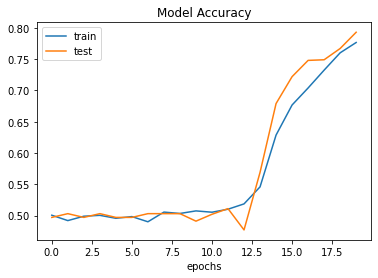

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [62]:
model.save("chatbot_model.h5")

In [63]:
pred_results = model.predict(([inputs_test, queries_test]))

In [64]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [65]:
story=' '.join(word for word in test_data[0][0])

In [66]:
story

'Mary got the milk there . John moved to the bedroom .'

In [67]:
query = ' '.join(word for word in test_data[0][1])

In [68]:
query

'Is John in the kitchen ?'

In [69]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [70]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [71]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [72]:
my_question = "Is the football in the garden ?"

In [73]:
mydata = [(my_story.split(), my_question.split(),'yes')]

In [74]:
my_story, my_ques ,my_ans = vectorize_stories(mydata)
pred_results = model.predict(([my_story, my_ques]))
val_max = np.argmax(pred_results[0])
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [75]:
k

'yes'

In [76]:
pred_results[0][val_max]

0.9034953